In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/product_analytics'
df_test = pd.read_csv(f'{file_path}/test_group.csv', sep=';')
df_control = pd.read_csv(f'{file_path}/control_group.csv', sep=';')

In [ ]:
from scipy.stats import ttest_ind

# Обчислення CTR
df_test = df_test[df_test['# of Impressions'] > 0].copy()
df_control = df_control[df_control['# of Impressions'] > 0].copy()

df_test['CTR'] = df_test['# of Website Clicks'] / df_test['# of Impressions']
df_control['CTR'] = df_control['# of Website Clicks'] / df_control['# of Impressions']

# Статистичний тест
t_stat, p_value = ttest_ind(df_test['CTR'], df_control['CTR'], equal_var=False)

print("Результати t-тесту для CTR:")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-значення: {p_value:.4f}")

if p_value < 0.05:
    print("Результат є статистично значущим: CTR у групах різниться.")
else:
    print("Немає статистично значущої різниці між CTR у групах.")

Результати t-тесту для CTR:
t-статистика: 3.9786
p-значення: 0.0003
Результат є статистично значущим: CTR у групах різниться.


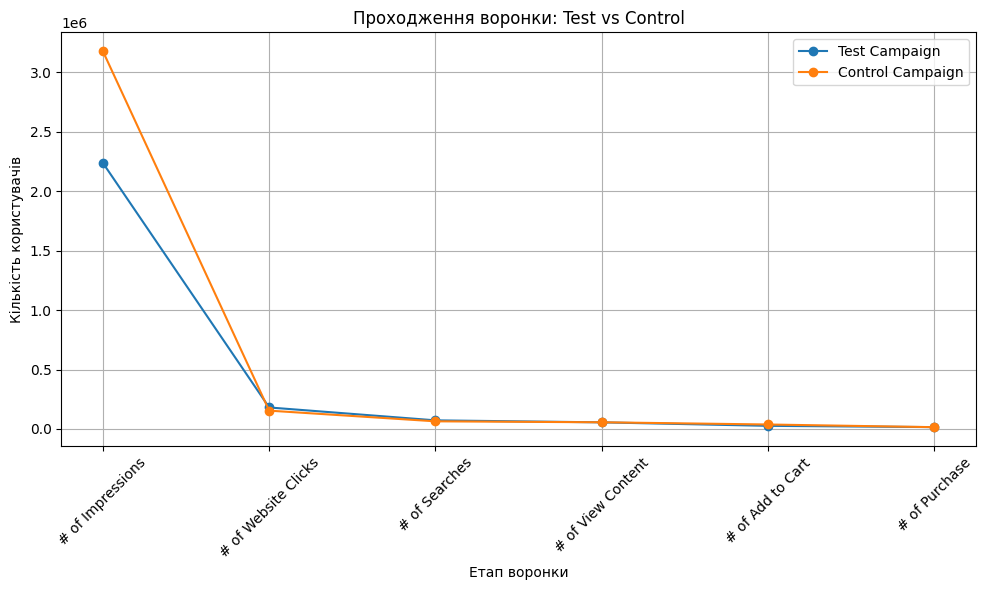

In [ ]:
import matplotlib.pyplot as plt

# Column rename
df_test.columns = df_test.columns.str.strip()
df_control.columns = df_control.columns.str.strip()

# Сумарні значення по етапах воронки
steps = [
    '# of Impressions',
    '# of Website Clicks',
    '# of Searches',
    '# of View Content',
    '# of Add to Cart',
    '# of Purchase'
]

test_totals = df_test[steps].sum()
control_totals = df_control[steps].sum()

# Побудова воронки
plt.figure(figsize=(10, 6))
plt.plot(steps, test_totals, marker='o', label='Test Campaign')
plt.plot(steps, control_totals, marker='o', label='Control Campaign')
plt.xticks(rotation=45)
plt.title("Проходження воронки: Test vs Control")
plt.xlabel("Етап воронки")
plt.ylabel("Кількість користувачів")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## **Аналіз воронки: Тестова vs Контрольна кампанії**

| Етап               | Control (%) | Test (%) | Зміна    | Висновок                                                                                                                                     |
| ------------------ | ----------- | -------- | -------- | -------------------------------------------------------------------------------------------------------------------------------------------- |
| Impressions     | 100.00      | 100.00   | —        | Базова точка, однакова                                                                                                                       |
| Website Clicks | 4.86        | 8.09     | 🔼 +66%  | Тестова кампанія значно краще залучає кліки — можливо, кращі візуали, заклики або аудиторія.                                                 |
| Searches        | 2.03        | 3.24     | 🔼 +59%  | Більше людей зацікавились напрямками — тестовий варіант краще стимулює дослідження.                                                          |
| View Content    | 1.77        | 2.49     | 🔼 +41%  | Користувачі частіше переглядають деталі — хороший показник релевантності.                                                                    |
| Add to Cart     | 1.19        | 1.18     | 🔽 -0.8% | На цьому етапі — **просідання**. Хоча більше людей дійшло до перегляду, в кошик додають не частіше. Можливо, проблема в ціні, умовах або UI. |
| Purchase        | 0.48        | 0.70     | 🔼 +45%  | Загальна конверсія у покупку вища у тестовій кампанії — навіть попри однаковий "add to cart", більше людей доходить до кінця.                |

---

## **Ключові Висновки**

1. **Тестова кампанія показала кращі результати** на всіх верхніх етапах воронки (clicks, searches, views).
2. **Конверсія в покупку теж вища** в тестовій групі (+45%), що вказує на вищу ефективність загалом.
3. **Add to Cart майже однаковий**, попри більшу залученість на попередніх етапах. Це потенційна зона для покращення:

   * Перевірити, чи ціни або комісії лякають користувачів.
   * Перевірити UX кошика (юзабіліті, етапи оформлення).

---

## **Рекомендації**

* Провести **якісний аналіз** причин drop-off після "View Content" — можливо, потрібно A/B-тестувати варіанти сторінки продукту або сам процес додавання до кошика.
* **Зберегти метрики для відстеження динаміки з часом.**
